# Латентый семантический анализ

Пусть дано 6 документов и 5 термов (корабль, лодка, океан, древесина, дерево). 
Рассмотрим небольшую матрицу терм-документ. 

In [81]:
import numpy as np
C = np.array([[ 1,  0,  1,  0,  0, 0],
              [ 0,  1,  0,  0,  0, 0],
              [ 1,  1,  0,  0,  0, 0],
              [ 1,  0,  0,  1,  1, 0], 
              [ 0,  0,  0,  1,  0, 1]])


Найдем сингулярное разложение матрицы $C = U \Sigma V^T $ и проверим, что по произведению $ U \Sigma V^T$ получается восстановить исходную матрицу. Заметим, что необходимости транспонировать $V$ нет – матрица возвращается уже транспонированная. 

In [82]:
U, s, V = np.linalg.svd(C, full_matrices=False)
C_new = np.dot(np.dot(U, np.diag(s)), V)
print np.std(C - C_new)

4.41693455879e-16


Матрица $U$ имеет размерность $5 \times 5$ – по количеству термов. Матрица $U$ ортонормальна: длина векторов-строк равна 1, все вектора-строки попарно ортогональны.

Матрицу $U$ можно понимать так: строки – это термы, столбцы – это некие "семантические" размерности, отвечающие за определенные размерности. Числа показывают, насколько каждый терм $i$ принадлежит к каждой теме, представленной семантической размерностью $j$. 



In [104]:
print np.around(U, decimals = 2)

[[ 0.44 -0.3  -0.57  0.58 -0.25]
 [ 0.13 -0.33  0.59 -0.   -0.73]
 [ 0.48 -0.51  0.37 -0.    0.61]
 [ 0.7   0.35 -0.15 -0.58 -0.16]
 [ 0.26  0.65  0.41  0.58  0.09]]


Матрица $V$ имеет размерность $5 \times 6$ – 5 термов, 6 документов. Так же как и $U$, $V$ ортонормальна: длина векторов-столбцов равна 1, все вектора-столбцы попарно ортогональны.

Матрица $V$ показывает, насколько в документ $j$ выражена тема $i$.

In [105]:
print np.around(V, decimals = 2)

[[ 0.75  0.28  0.2   0.45  0.33  0.12]
 [-0.29 -0.53 -0.19  0.63  0.22  0.41]
 [-0.28  0.75 -0.45  0.2  -0.12  0.33]
 [-0.   -0.    0.58  0.   -0.58  0.58]
 [ 0.53 -0.29 -0.63 -0.19 -0.41  0.22]]


Матрица $\Sigma$ – это диагональная матрица $5 \times 5$, в которой представлены сингулярные числа. Величина сингулярного числа демонстрирует значимость соответствующей семантической разменрности. С помощью обнуления небольших сингулярных значений можно избавиться от незначимых семантических размерностей.


In [107]:
print np.around(np.diag(s), decimals = 2)

[[ 2.16  0.    0.    0.    0.  ]
 [ 0.    1.59  0.    0.    0.  ]
 [ 0.    0.    1.28  0.    0.  ]
 [ 0.    0.    0.    1.    0.  ]
 [ 0.    0.    0.    0.    0.39]]


Обнуляем 3-5 сингулярное значение.

In [120]:
s_2 = np.diag(np.array(s[:2]))
print np.around(s_2, decimals = 2)

[[ 2.16  0.  ]
 [ 0.    1.59]]


Оставляем два столбца в $U$.

In [118]:
U_2 = U[:,:2]
print np.around(U_2, decimals = 2)

[[ 0.44 -0.3 ]
 [ 0.13 -0.33]
 [ 0.48 -0.51]
 [ 0.7   0.35]
 [ 0.26  0.65]]


Оставляем две строки в $U$.

In [115]:
V_2 = V[:2,:]
print np.around(V_2, decimals = 2)

[[ 0.75  0.28  0.2   0.45  0.33  0.12]
 [-0.29 -0.53 -0.19  0.63  0.22  0.41]]


Находим приближение ранга 2 к исходной матрице .

In [127]:
C_2 = np.dot(np.dot(U_2, s_2), V_2)
print np.around(C_2, decimals = 2)

[[ 0.85  0.52  0.28  0.13  0.21 -0.08]
 [ 0.36  0.36  0.16 -0.21 -0.03 -0.18]
 [ 1.    0.72  0.36 -0.05  0.16 -0.21]
 [ 0.98  0.13  0.21  1.03  0.62  0.41]
 [ 0.13 -0.39 -0.08  0.9   0.41  0.49]]


Проверим ранг.

In [126]:
print np.rank(C_2)

2


Снижение размерности – это хорошо, потому что документы, содержащие синонимы становятся похожими:

In [149]:
sim1 = sum(C[:,1]*C[:,2])
sim2 = sum(C_2[:,1]*C_2[:,2])
print sim1
print sim2

In [145]:
0.52*0.28 + 0.36 * 0.16 + 0.72 * 0.36 + 0.12 * 0.20 + -0.39 * -0.08 

0.5176

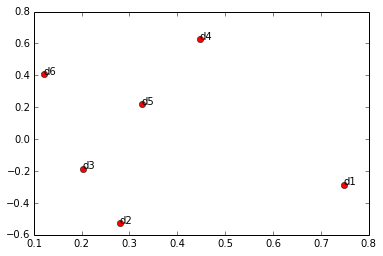

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(V_2[0,:], V_2[1,:], 'ro')
labels = ['d'+str(i) for i in range(1,7)]
for label, x, y in zip(labels, V_2[0,:], V_2[1,:]):
    plt.annotate(label, xy = (x, y))

plt.show()